# General Trend - User Participation Rate

In [1]:
#Specify all data paths
stackQ_path = "/Users/Ye/Desktop/BT4222/Project/SampleQuestions.csv"
stackA_path = "/Users/Ye/Desktop/BT4222/Project/SampleAnswers.csv"
users_path = "/Users/Ye/Desktop/BT4222/Project/Users.csv"
badges_path = "/Users/Ye/Desktop/BT4222/Project/Badges.csv"

In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [3]:
# # reading the questions dataset directly from Stack 10% sample
# %store -r stack_answer
# %store -r stack_question

## Stack Questions

In [4]:
# stack_question.shape

In [5]:
#stack_question.head()

In [6]:
#stack_question["CreationDate"]=pd.to_datetime(stack_question["CreationDate"]).apply(lambda x: str(x.date()))

In [7]:
# #count the number of questions by date
# date_count_qn = pd.DataFrame(stack_question.groupby('CreationDate')['Id'].count())

In [8]:
# %store date_count_qn

In [9]:
%store -r date_count_qn

In [10]:
# strip dates as preparations for formatting y-axis later
date_count_qn['Date'] = date_count_qn.index
date_count_qn = date_count_qn.rename(columns={'Id':'Count'})
dates_qn = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in date_count_qn.Date] # datetime axis 

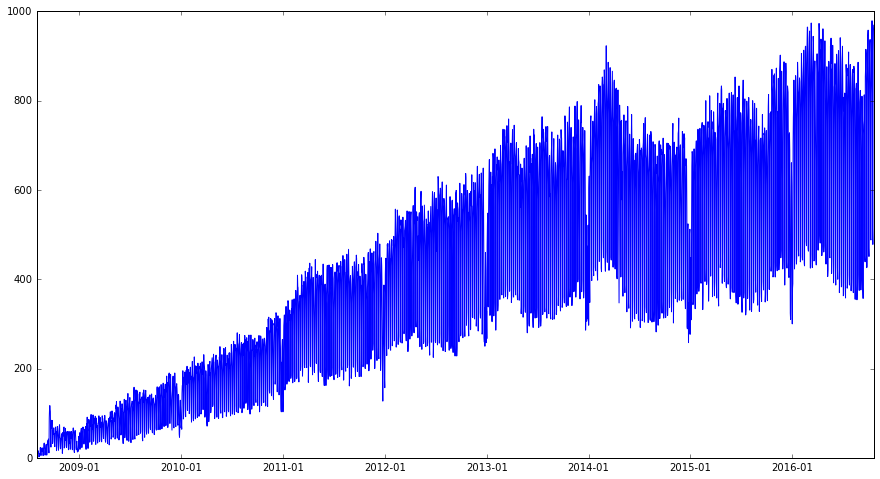

In [11]:
# initial plot on questions count
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.plot(dates_qn, date_count_qn.Count)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# but as you can see, there were many fluctuations => we decided to get a 30-day moving average 
# (can include or exclude, I put here just because I am not sure whether we should include or not)

/Users/Ye/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,span=30,min_periods=0,adjust=True).mean(how=mean)
  from ipykernel import kernelapp as app


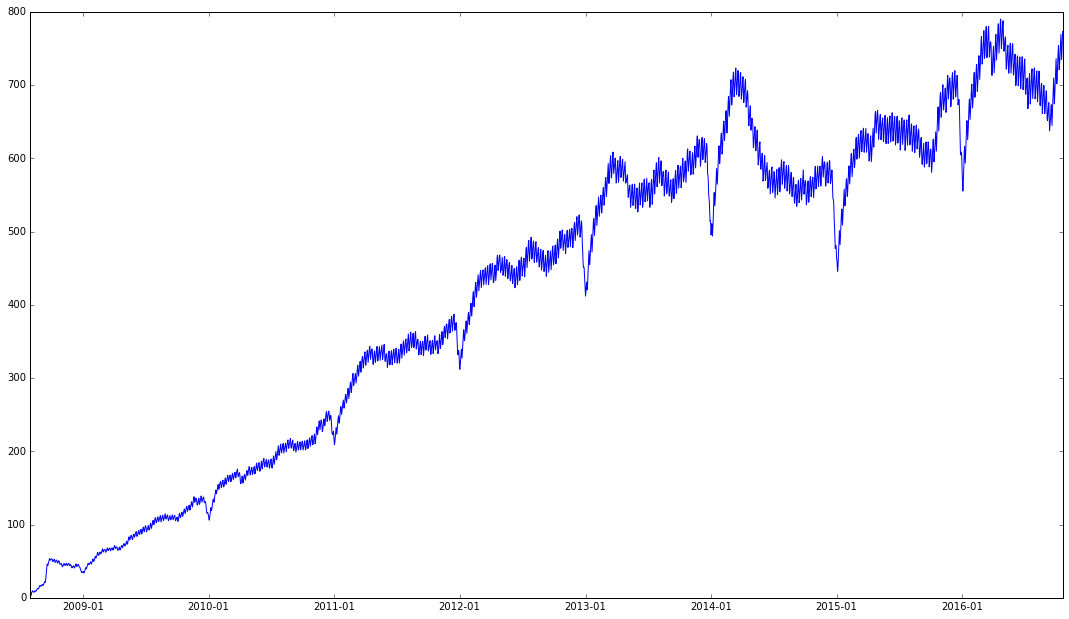

In [12]:
# plotting the questions by date using 30-day moving average 
ma = pd.ewma(date_count_qn, span= 30, how='mean')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
ax = plt.subplot()
ax.plot(dates_qn, ma.Count)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# plt.savefig('qns_plot.jpg')

In [13]:
# # for user signups, we use the users.csv from SO data dump 
# #users = pd.read_csv(users_path)
# users["CreationDate"] = pd.to_datetime(users["CreationDate"]).apply(lambda x: str(x.date()))
# date_count_user = pd.DataFrame(users.groupby('CreationDate')['Id'].count())
# date_count_user = date_count_user.rename(columns={'Id':'Count'})

In [14]:
#%store date_count_user

In [15]:
%store -r date_count_user

In [16]:
# initial plot on user signups 
date_count_user['Date'] = date_count_user.index
dates_user = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in date_count_user.Date] # y-axis 

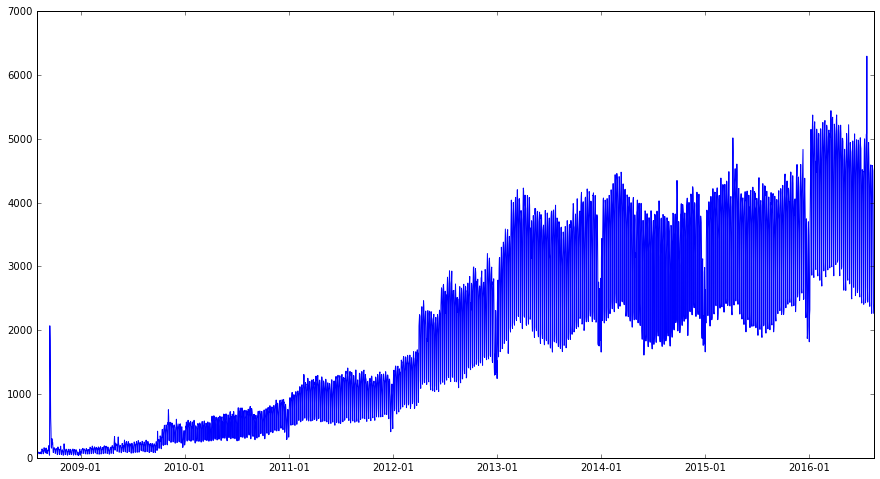

In [17]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.plot(dates_user, date_count_user.Count)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

/Users/Ye/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,span=30,min_periods=0,adjust=True).mean(how=mean)
  if __name__ == '__main__':


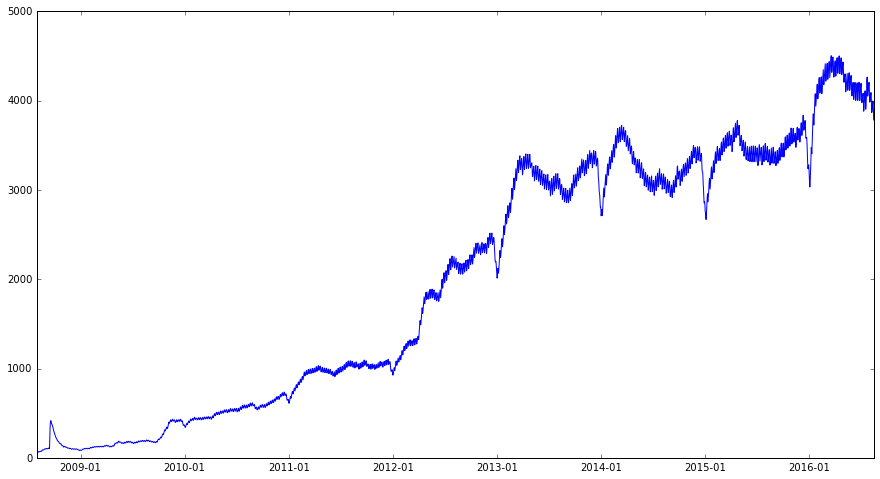

In [18]:
ma_signup = pd.ewma(date_count_user, span= 30, how='mean')
dates_user = pd.DataFrame(dates_user)
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.plot(dates_user, ma_signup.Count)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# plt.savefig('user_signup.jpg')

## Stack Answers

In [19]:
# stack_answer["CreationDate"]=pd.to_datetime(stack_answer["CreationDate"]).apply(lambda x: str(x.date()))

In [20]:
# count the number of answers by date
# date_count_ans = pd.DataFrame(stack_answer.groupby('CreationDate')['Id'].count())

In [21]:
# %store date_count_ans

In [22]:
%store -r date_count_ans

In [23]:
# strip dates as preparations for formatting y-axis later
date_count_ans['Date'] = date_count_ans.index
date_count_ans = date_count_ans.rename(columns={'Id':'Count'})
dates_ans = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in date_count_ans.Date] # datetime axis 

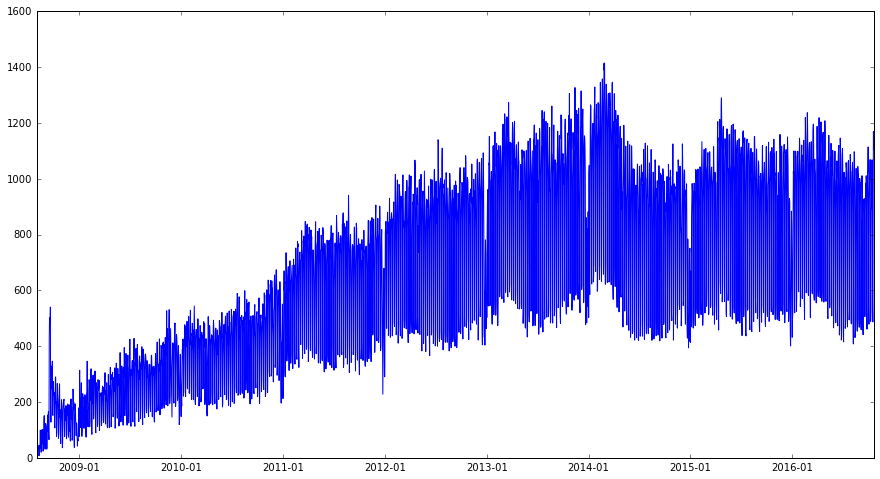

In [24]:
# initial plot of ans
plt.gcf()
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.plot(dates_ans, date_count_ans.Count)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

/Users/Ye/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,span=30,min_periods=0,adjust=True).mean(how=mean)
  from ipykernel import kernelapp as app


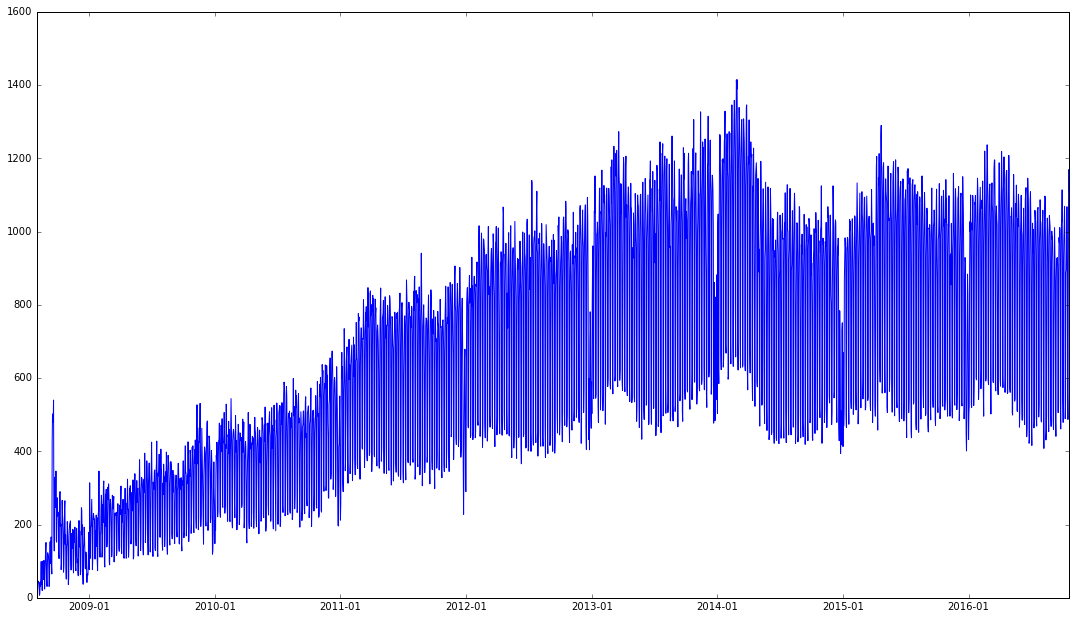

In [25]:
# plot answers count by date using 30-day moving average
ma_ans = pd.ewma(date_count_ans, span= 30, how='mean')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
ax = plt.subplot()
ax.plot(dates_ans, date_count_ans.Count)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# plt.savefig('ans_plot.jpg')